<span style="font-size: 24px; color: blue;">Data Processing</span>

First, the libraries that are needed in this notebook will be imported

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [238]:
data=pd.read_csv(r"Data/cardata.csv")
df=pd.DataFrame(data)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In this project, the target is Selling_price. To have an overview, the description of each feature is written.

| Column   | Description                  |
|----------|------------------------------|
| year     | the year the car has been bought      |
| selling price     | Price                 |
| Present Price    | Previous Price  |
| KMS | How many km the car has been droven|
| Fuel| Types of fuel|
| Seller type| How the car is dealing|
| Transmission| Gear tramsmissionm of cars|
| Owner| How many Owner the car had|

We would like to find the selling price for the car with the following features.

    find the price
    present price: 11:23
    kms: 42000
    fuel: petrol
    seller: dealer
    transmission: manual
    owner: 1
    age:10
    price:?

<span style="font-size: 24px; color: blue;">Data Analyzation</span>

In [239]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [241]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

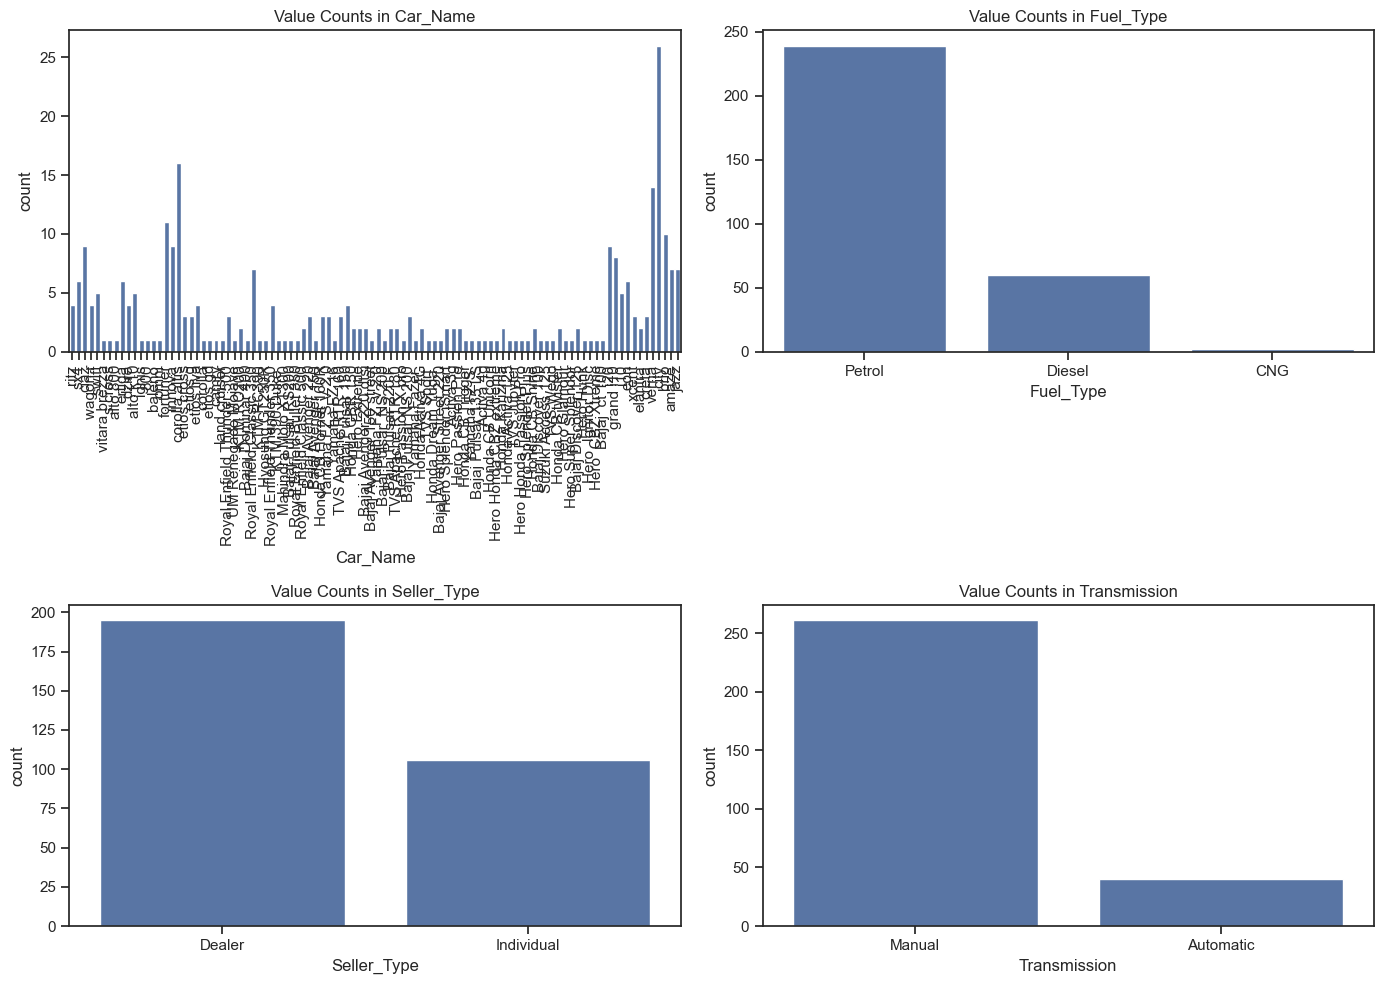

In [242]:
selected_columns = df.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(2, 2, figsize=(14,10))
for i, col_name in enumerate(selected_columns):
    ax = axes[i//2, i%2]
    sns.countplot(data=df, x=col_name, ax=ax)
    ax.set_title(f'Value Counts in {col_name}')
    
    if col_name == 'Car_Name':
        ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig("Images/plot1.png", dpi=300, bbox_inches="tight")
plt.show()


No missing values

____

<span style="font-size: 18px; color: magenta;"> Checking Outliers</span>

In [243]:
df[df.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [244]:
df.drop_duplicates(inplace=True)

In [245]:
df.shape

(299, 9)

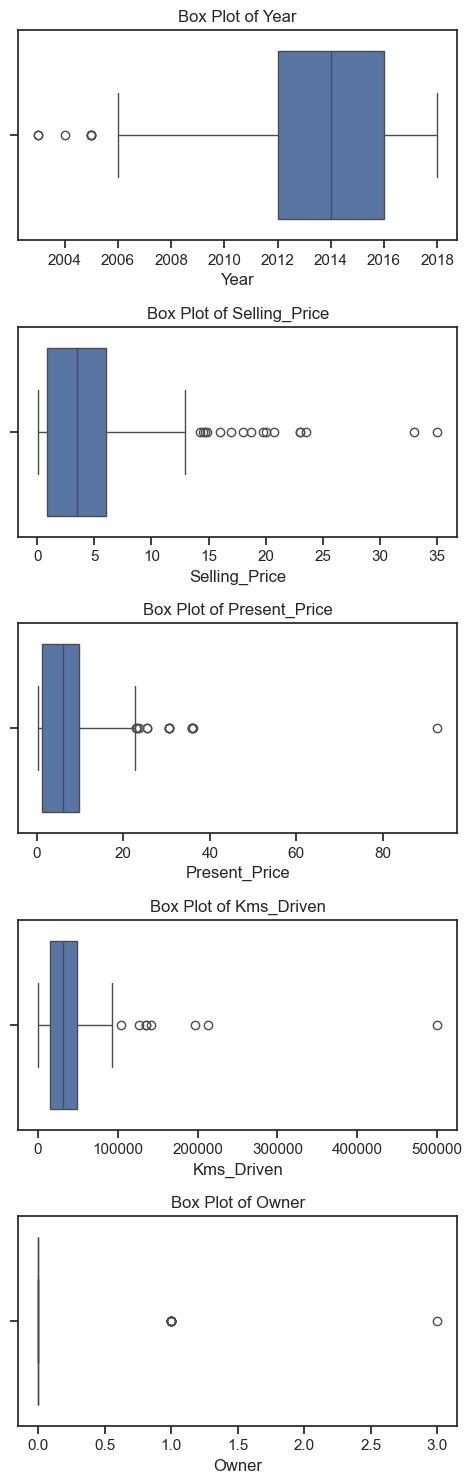

In [246]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
#graphs - one row per plot
n = len(numeric_columns)
fig, axes = plt.subplots(n, 1, figsize=(5, 3 * n))  
for i, col_name in enumerate(numeric_columns):
    ax = axes[i] if n > 1 else axes  # Handle case when n == 1
    sns.boxplot(data=df, x=col_name, ax=ax, orient='h')
    ax.set_title(f'Box Plot of {col_name}', fontsize=12)
    ax.set_xlabel(col_name)

plt.tight_layout()
plt.savefig("Images/plot2.png", dpi=300, bbox_inches="tight")
plt.show()


to realise whether there is outliers we need other graphs

In [247]:
pair = sns.pairplot(df)
pair.savefig("Images/pairplot.png", dpi=300, bbox_inches="tight")
plt.close()


In [248]:
# Removing outliers
df[df.Selling_Price>30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [249]:
df[df.Present_Price>75]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [250]:
df[df.Kms_Driven>400000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [251]:
df[df.Owner==3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


I only doubt the selling price of the Land Cruiser since kms driven are not a few, and also the car is from the year 2010, but for now, I will keep all data,

<span style="font-size: 18px; color: magenta;">Data Visualization</span>

In [252]:
# the name of cars is not needed for the following code
df1=df.copy()
df1.drop('Car_Name', axis=1, inplace=True)

In [253]:
# By finding the maximum year in the dataset, we can calculate the age of cars
df1['Year'].max()

2018

In [254]:
df1['Age']=2018-df['Year']

In [255]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478,4.384615
std,2.896868,4.984240,8.567887,39015.170352,0.248720,2.896868
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000,2.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000,4.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000,6.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,15.000000


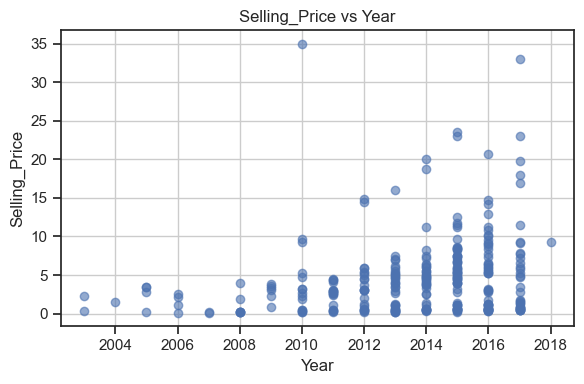

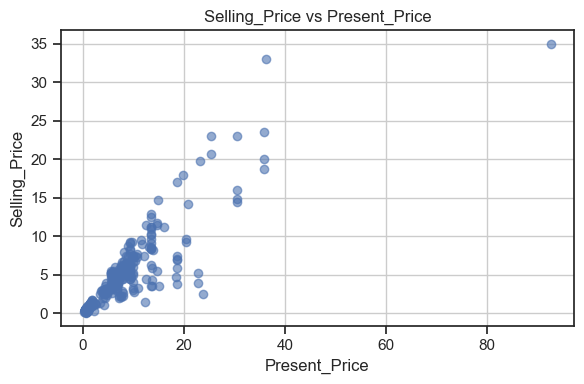

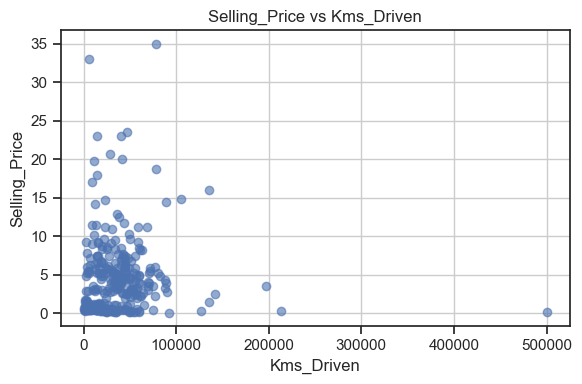

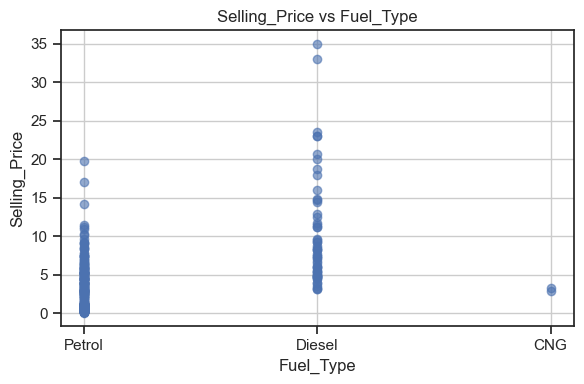

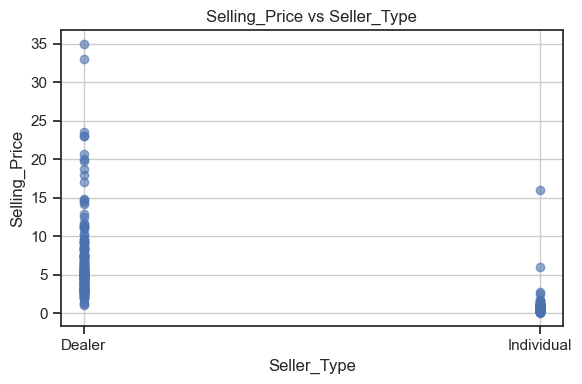

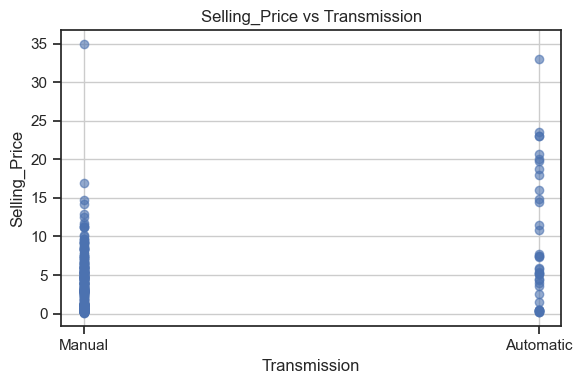

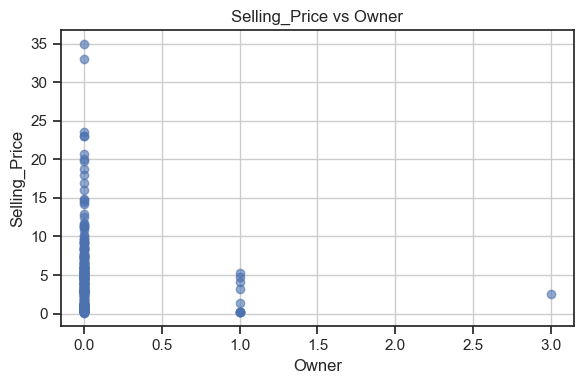

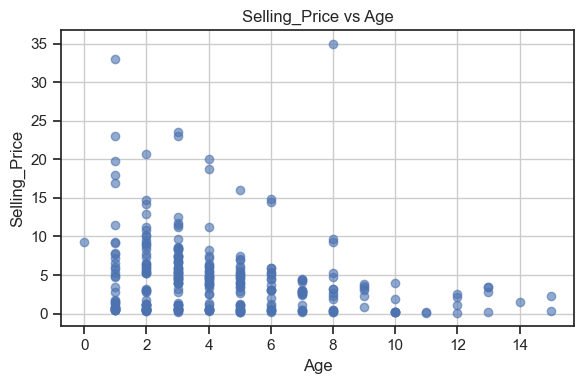

In [256]:
# Visualization of Selling-Price vs Features
for col in df1:
    if col != 'Selling_Price':
        plt.figure(figsize=(6, 4))
        plt.scatter(df1[col], df1['Selling_Price'], alpha=0.6)
        plt.xlabel(col)
        plt.ylabel('Selling_Price')
        plt.title(f'Selling_Price vs {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig("Images/Selling_price vs Features.png", dpi=300, bbox_inches="tight")
        plt.show()

    * The selling price and present price have an almost linear relationship, meaning that if the present price increases, the selling price also increases
    * Most of the cars have driven fewer than 100000km, and fewer km driven increases the selling price
    * No previous owner also affects the selling price, and in this dataset, most of the cars have 0 owners
    * The older the car gets, the lower the selling price is
    * Most of the cars will be sold through dealers
    
  

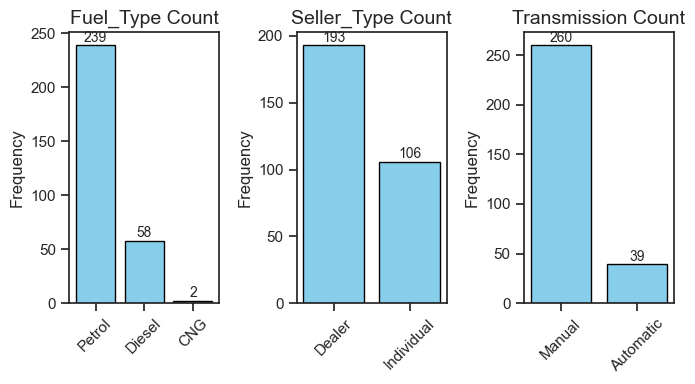

In [257]:
obj_cols = df1.select_dtypes(include='object').columns
fig, axes = plt.subplots(1, 3, figsize=(7, 4 ))

# Loop through each object column
for i, col in enumerate(obj_cols):
    counts = df1[col].value_counts()
    bars = axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')

    #count on top of each bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
                     ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'{col} Count', fontsize=14)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig("Images/Frequency Plots.png", dpi=300, bbox_inches="tight")
plt.show()

* Most cars use petrol as fuel
* Most of the cars will be sold through dealers
* A great number of cars are manual

In [258]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='Reds')
plt.title('Heatmap of Correlation between features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("Images/Correlation.png", dpi=300, bbox_inches="tight")
plt.close()

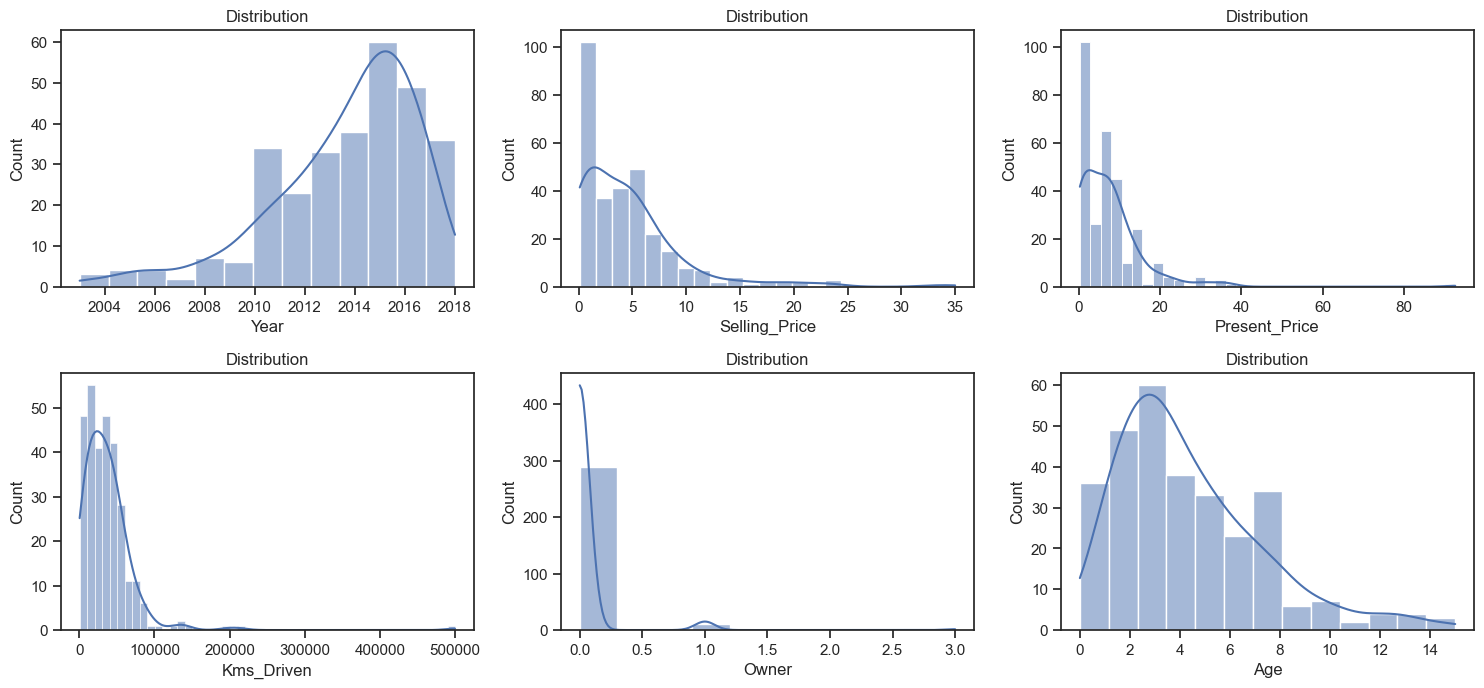

In [259]:
# Check distributions
num_col=df1.select_dtypes(include='number').columns
plt.figure(figsize=(15,10))
for i, col in enumerate(num_col, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df1, x=col, kde=True)
    plt.title("Distribution")
plt.tight_layout()
plt.savefig("Images/Countplot.png", dpi=300, bbox_inches="tight")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

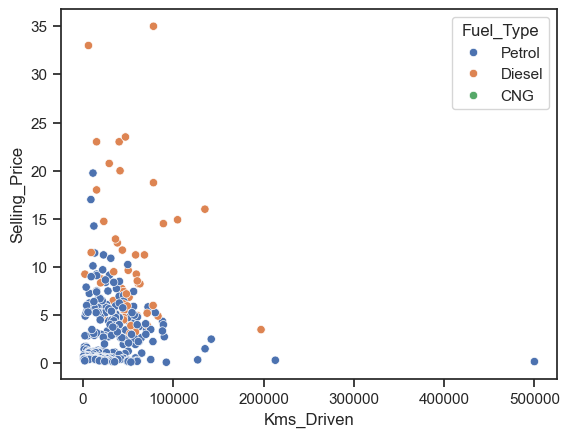

In [260]:
sns.scatterplot(data=df1, x='Kms_Driven',y='Selling_Price', hue='Fuel_Type')
plt.savefig("Images/Fuel-Typle scatterplot.png", dpi=300, bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

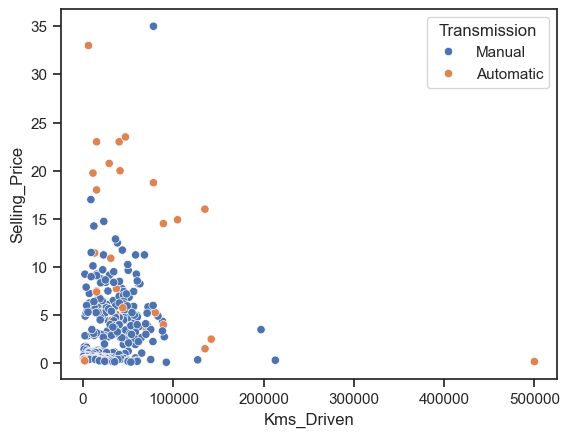

In [261]:
sns.scatterplot(data=df1, x='Kms_Driven',y='Selling_Price', hue='Transmission')
plt.savefig("Images/Transmission.png", dpi=300, bbox_inches="tight")
plt.show

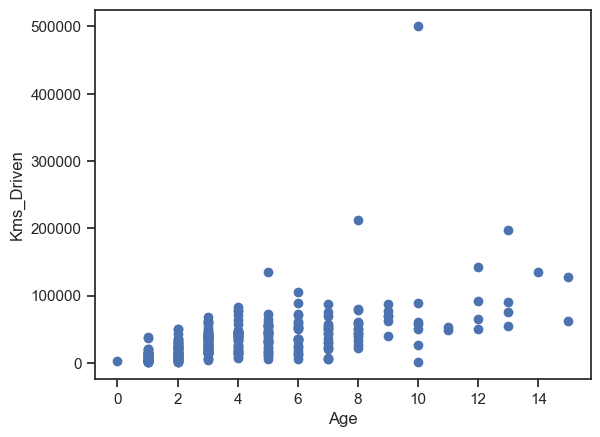

In [262]:
plt.scatter(data=df1, x='Age',y='Kms_Driven')
plt.xlabel('Age')
plt.ylabel('Kms_Driven')
plt.savefig("Images/kms-Driven.png", dpi=300, bbox_inches="tight")
plt.show()

In [263]:
max_kms = df['Kms_Driven'].max()
print("Maximum Kms_Driven:", max_kms)


Maximum Kms_Driven: 500000


In [264]:
df2=df1.copy()
df2= df2[df2['Kms_Driven'] < max_kms]

<span style="font-size: 18px; color: magenta;"> Dataset Preparation for Modeling</span>

As a first step, we need to convert categorical columns to numerical to generate a model 

In [265]:
df3=df2.copy()

In [266]:
object_cols = df3.select_dtypes(include='object').columns

for col in object_cols:
    print(f"{col}:")
    print(df2[col].unique())
    print("-" * 40)

Fuel_Type:
['Petrol' 'Diesel' 'CNG']
----------------------------------------
Seller_Type:
['Dealer' 'Individual']
----------------------------------------
Transmission:
['Manual' 'Automatic']
----------------------------------------


In [267]:
# We replace these features with numbers, and since the modelling will be regression, we start numbering from 2 to show their influence on the modelling
replace={
    'Fuel_Type':{'Petrol':2,'Diesel':3,'CNG':4},
    'Seller_Type':{'Dealer':2,'Individual':3},
    'Transmission':{'Manual':2,'Automatic':3}}

In [268]:
df3.replace(replace,inplace=True)

C:\Users\Afroo\AppData\Local\Temp\ipykernel_5856\1064655093.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace(replace,inplace=True)


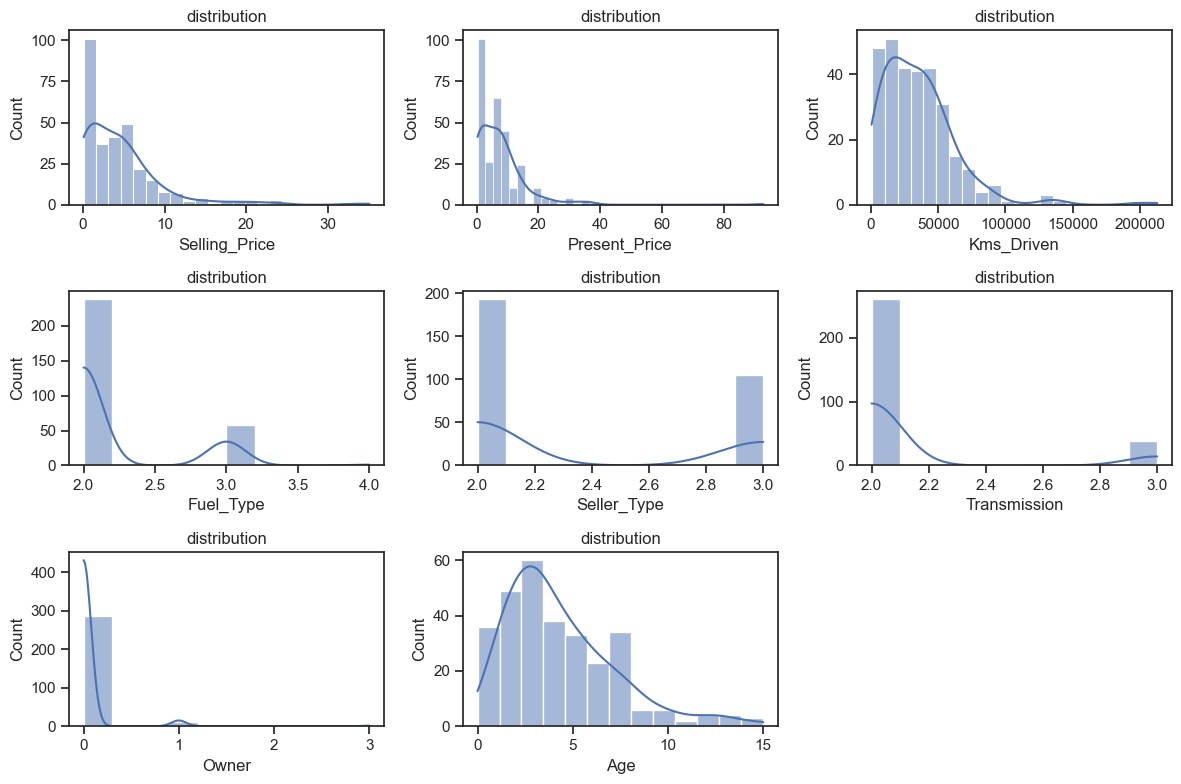

In [269]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df2.columns[1:],1):
    plt.subplot(3,3,i)
    sns.histplot(data=df3, x=col, kde=True)
    plt.title('distribution')
plt.savefig("Images/Distribution.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [270]:
plt.figure(figsize=(8,5))
sns.heatmap(df3.corr(numeric_only=True), annot=True, cmap='Reds')
plt.title('Heatmap of Correlation between features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("Images/Heatmap.png", dpi=300, bbox_inches="tight")
plt.close()

In [271]:
df3.drop('Year', axis=1,inplace=True)

In [272]:
# normalization only on features and just the specific columns that the range is not between 1,10
df4=df3.copy()
scaler=MinMaxScaler(feature_range=(1,10))
scaler.fit(df3[['Present_Price','Kms_Driven','Age']])
df3[['Present_Price','Kms_Driven','Age']]=scaler.transform(df3[['Present_Price','Kms_Driven','Age']])
df3
           

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,1.513979,2.122353,2,2,2,0,3.4
1,4.75,1.899220,2.800000,3,2,2,0,4.0
2,7.25,1.929454,1.271059,2,2,2,0,1.6
3,2.85,1.373537,1.199059,2,2,2,0,5.2
4,4.60,1.638817,2.776706,3,2,2,0,3.4
...,...,...,...,...,...,...,...,...
296,9.50,2.100130,2.418315,3,2,2,0,2.2
297,4.00,1.544213,3.520000,2,2,2,0,2.8
298,3.35,2.041612,4.703087,2,2,2,0,6.4
299,11.50,2.187906,1.360000,3,2,2,0,1.6


In [273]:
# defining x and y of model
X=df4.drop('Selling_Price', axis=1)
y=df4['Selling_Price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)


In [274]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [275]:
y_pred=regressor.predict(X_test)

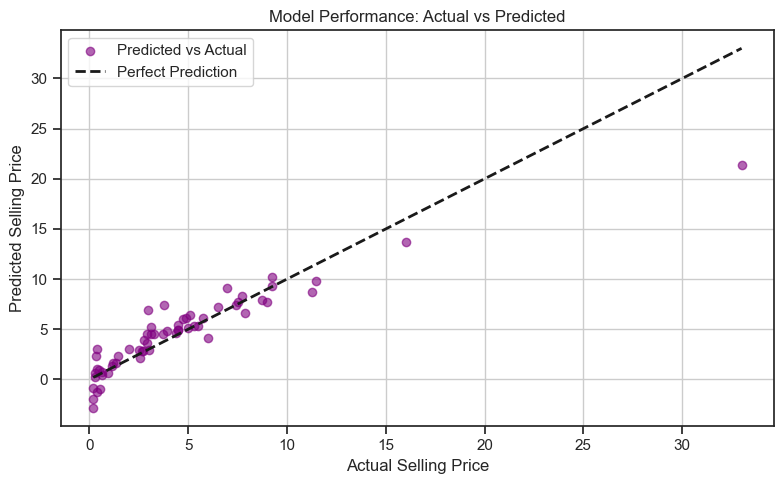

In [276]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Model Performance: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Images/Model Performance.png", dpi=300, bbox_inches="tight")
plt.show()

* First Model

In [277]:
#lets find an equation for this model
print('intercept= ',regressor.intercept_)
print(regressor.coef_)

intercept=  [1.05146254]
[[ 4.26463820e-01 -1.84588322e-05  1.63118764e+00 -1.54814966e+00
   1.15740472e+00 -7.49307262e-01 -3.19740645e-01]]


In [278]:
# Present_Price	=4.26463820e-01 =0.42
# Kms_Driven	=-1.84588322e-05=-0.000018
# Fuel_Type	 = 1.63118764e+00=1.63
# Seller_Type	= -1.54814966e+00=-1.54
# Transmission = 1.15740472e+00=1.157
# Owner	= -7.49307262e-01=-0.749
# Age =-3.19740645e-01=-0.319

In [279]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2',metrics.r2_score(y_test,y_pred ))

Mean Absolute Error 1.2090220235106632
Mean Squared Error 4.139130152975282
Root Mean Squared Error 2.0344852304637855
R2 0.8335656173167809


Since R2 is 0.83, it sounds like the accuracy of the model is not really good, and we need to change some parameters to achieve a better model However, first, a comparison between the actual selling price and the prediction is necessary.

In [280]:
compare=pd.DataFrame({'Actual':y_test.flatten(),'prediction':y_pred.flatten()})
compare

,Actual,prediction
0,1.15,1.295707
1,0.35,2.302194
2,7.50,7.692699
3,4.50,5.396056
4,7.90,6.603558
5,3.95,4.808562
6,2.90,3.606480
7,0.38,-1.302772
8,0.20,-0.901939
9,4.50,4.958146


The actual and predicted values have differences and defenitly the model needs improvment

* 2th Model

** Changing the test-size

In [281]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)


In [282]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Model Performance: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Images/Second Model Performance.png", dpi=300, bbox_inches="tight")
plt.close()

In [283]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2',metrics.r2_score(y_test,y_pred ))

Mean Absolute Error 1.189139479645191
Mean Squared Error 4.021601615621316
Root Mean Squared Error 2.005393132435961
R2 0.8294245653325101


r2 decreased

* 3th model

In [284]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.1, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Model Performance: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Images/Third Model Performance.png", dpi=300, bbox_inches="tight")
plt.close()

In [285]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2',metrics.r2_score(y_test,y_pred ))

Mean Absolute Error 1.3261901665497504
Mean Squared Error 6.270358282321741
Root Mean Squared Error 2.504068346176226
R2 0.8380771435864285


seems just by changing random state we can not reach the best model

* 4th Model, Cross-validation

In [286]:
# 1. Cross-validation block
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='r2')
print("R² scores for each fold:", cv_scores)
print("Average R² score:", cv_scores.mean())

# 2. Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


R² scores for each fold: [0.83356562 0.81065349 0.92033694 0.78637835 0.74936604]
Average R² score: 0.8200600873775163


<span style="font-size: 18px; color: Blue;"> What I realised so far, changing random state does not have big influence on R2 and needs to work on form of data</span>

* 5th Model

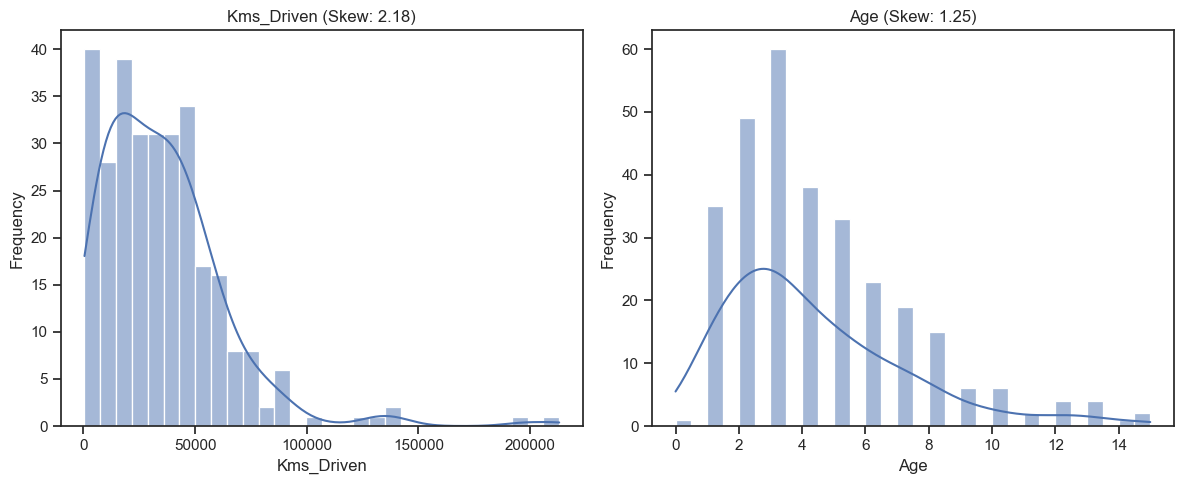

In [287]:
features = ['Kms_Driven', 'Age']  
plt.figure(figsize=(12, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.histplot(df4[col], bins=30, kde=True)
    skew_val = df4[col].skew()
    plt.title(f'{col} (Skew: {skew_val:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("Images/Skewness.png", dpi=300, bbox_inches="tight")
plt.show()


Both of those features are right-skewed, and at this moment we can try log transformation and see whether we get a better result or not

In [288]:
df5=df4.copy()
Log_kms = np.log1p(df5['Kms_Driven'])  
Log_Age = np.log1p(df5['Age'])  


In [289]:
df5.insert(7,'Log_kms',Log_kms)


In [290]:
df5.insert(8,'Log_Age',Log_Age)
df5.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Log_kms,Log_Age,Age
0,3.35,5.59,27000,2,2,2,0,10.203629,1.609438,4
1,4.75,9.54,43000,3,2,2,0,10.668979,1.791759,5
2,7.25,9.85,6900,2,2,2,0,8.839422,0.693147,1
3,2.85,4.15,5200,2,2,2,0,8.556606,2.079442,7
4,4.60,6.87,42450,3,2,2,0,10.656106,1.609438,4


In [291]:
X5=df5.drop('Selling_Price', axis=1)
y5=df5['Selling_Price'].values.reshape(-1,1)
X5_train, X5_test, y5_train, y5_test= train_test_split(X5,y5, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X5_train,y5_train)
y5_pred=regressor.predict(X5_test)
print('intercept= ',regressor.intercept_)
print(regressor.coef_)
print('Mean Absolute Error', metrics.mean_absolute_error(y5_test,y5_pred))
print('Mean Squared Error', metrics.mean_squared_error(y5_test,y5_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y5_test,y5_pred)))
print('R2',metrics.r2_score(y5_test,y5_pred ))

intercept=  [-2.78315205]
[[ 4.24929122e-01 -3.30389671e-05  1.71975976e+00 -1.36978962e+00
   1.12122675e+00 -7.28649000e-01  6.02660180e-01 -2.68686584e+00
   1.11635766e-01]]
Mean Absolute Error 1.2077818727422331
Mean Squared Error 3.9483027888061626
Root Mean Squared Error 1.987033665745541
R2 0.8412387837504877


In [292]:
plt.figure(figsize=(8, 5))
plt.scatter(y5_test, y5_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y5_test.min(), y5_test.max()], [y5_test.min(), y5_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price 5th model')
plt.ylabel('Predicted Selling Price 5')
plt.title('Model Performance: Actual vs Predicted 5th model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Images/fifth model.png", dpi=300, bbox_inches="tight")
plt.close()

In [293]:
a = X5_test.Present_Price
b = y5_test
c = X5_test.Present_Price
d = y5_pred
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.scatter(a, b)
plt.scatter(c, d)
plt.savefig("Images/fifth model prediction.png", dpi=300, bbox_inches="tight")
plt.close()

still, the R2 is not increasing that much, and I am not sure that we can drop the outlier yet, but I will try to keep changing

In [294]:
df6=df5.copy()
present_price_age=df6.Present_Price*df6.Log_Age
df6.insert(9,'present_price_age',present_price_age)
df6.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Log_kms,Log_Age,present_price_age,Age
0,3.35,5.59,27000,2,2,2,0,10.203629,1.609438,8.996758,4
1,4.75,9.54,43000,3,2,2,0,10.668979,1.791759,17.093385,5
2,7.25,9.85,6900,2,2,2,0,8.839422,0.693147,6.827500,1
3,2.85,4.15,5200,2,2,2,0,8.556606,2.079442,8.629682,7
4,4.60,6.87,42450,3,2,2,0,10.656106,1.609438,11.056838,4


we can drop kms driven and age, and keep only the log of kms and age

In [295]:
X6 = df6.drop(['Selling_Price', 'Age', 'Kms_Driven'], axis=1)
y6=df6['Selling_Price'].values.reshape(-1,1)
X6_train, X6_test, y6_train, y6_test= train_test_split(X6,y6, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X6_train,y6_train)
y6_pred=regressor.predict(X6_test)
print('intercept= ',regressor.intercept_)
print(regressor.coef_)
print('Mean Absolute Error', metrics.mean_absolute_error(y6_test,y6_pred))
print('Mean Squared Error', metrics.mean_squared_error(y6_test,y6_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y6_test,y6_pred)))
print('R2',metrics.r2_score(y6_test,y6_pred ))

intercept=  [0.77963066]
[[ 1.13368361  1.01605184 -0.29266586 -0.28952091 -0.41133952 -0.16419938
   0.20076228 -0.36079506]]
Mean Absolute Error 0.5991433578303922
Mean Squared Error 0.820938950032303
Root Mean Squared Error 0.9060568139097587
R2 0.966990052904951


In [296]:
X6

,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Log_kms,Log_Age,present_price_age
0,5.59,2,2,2,0,10.203629,1.609438,8.996758
1,9.54,3,2,2,0,10.668979,1.791759,17.093385
2,9.85,2,2,2,0,8.839422,0.693147,6.827500
3,4.15,2,2,2,0,8.556606,2.079442,8.629682
4,6.87,3,2,2,0,10.656106,1.609438,11.056838
...,...,...,...,...,...,...,...,...
296,11.60,3,2,2,0,10.433792,1.098612,12.743903
297,5.90,2,2,2,0,11.002117,1.386294,8.179137
298,11.00,2,2,2,0,11.384353,2.302585,25.328436
299,12.50,3,2,2,0,9.105091,0.693147,8.664340


In [297]:
#checking overfitting
y6_train_pred = regressor.predict(X6_train)
# Compare R2
print("Train R2:", metrics.r2_score(y6_train, y6_train_pred))
print("Test R2:", metrics.r2_score(y6_test, y6_pred))

Train R2: 0.97476244897198
Test R2: 0.966990052904951


Since R2 train and test are close to each other, the model is not overfitted and it actually predicts nicely.

In [298]:
cv_scores = cross_val_score(regressor, X6, y6, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())

Cross-validated R2 scores: [ 0.935853    0.97091483 -0.33815888  0.94317004  0.91742177]
Mean CV R2: 0.6858401508343045


negative R2, indicating possible fold imbalance

In [299]:
#lets try shuffle
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(regressor, X6, y6, cv=kf, scoring='r2')
print("Shuffled CV R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())

Shuffled CV R2 scores: [0.94550983 0.95087644 0.96531067 0.98397541 0.97394843]
Mean CV R2: 0.9639241564319839


The model is stable

In [300]:
compare=pd.DataFrame({'Actual':y6_test.flatten(),'prediction':y6_pred.flatten()})
compare

,Actual,prediction
0,1.15,0.889449
1,0.35,0.049910
2,7.50,6.354379
3,4.50,3.322494
4,7.90,7.606753
5,3.95,4.510916
6,2.90,2.967052
7,0.38,0.230749
8,0.20,-0.082755
9,4.50,4.372484


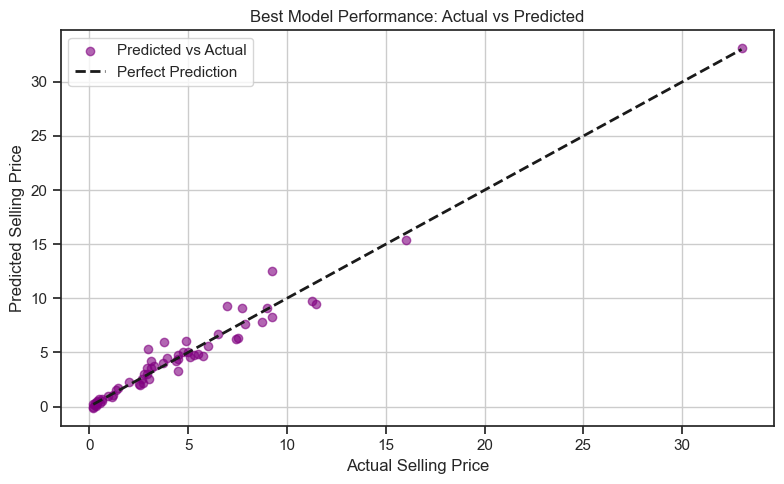

In [301]:
plt.figure(figsize=(8, 5))
plt.scatter(y6_test, y6_pred, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Best Model Performance: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Images/Best model performance.png", dpi=300, bbox_inches="tight")
plt.show()

<span style="font-size: 18px; color: magenta;"> Final Visualization</span>

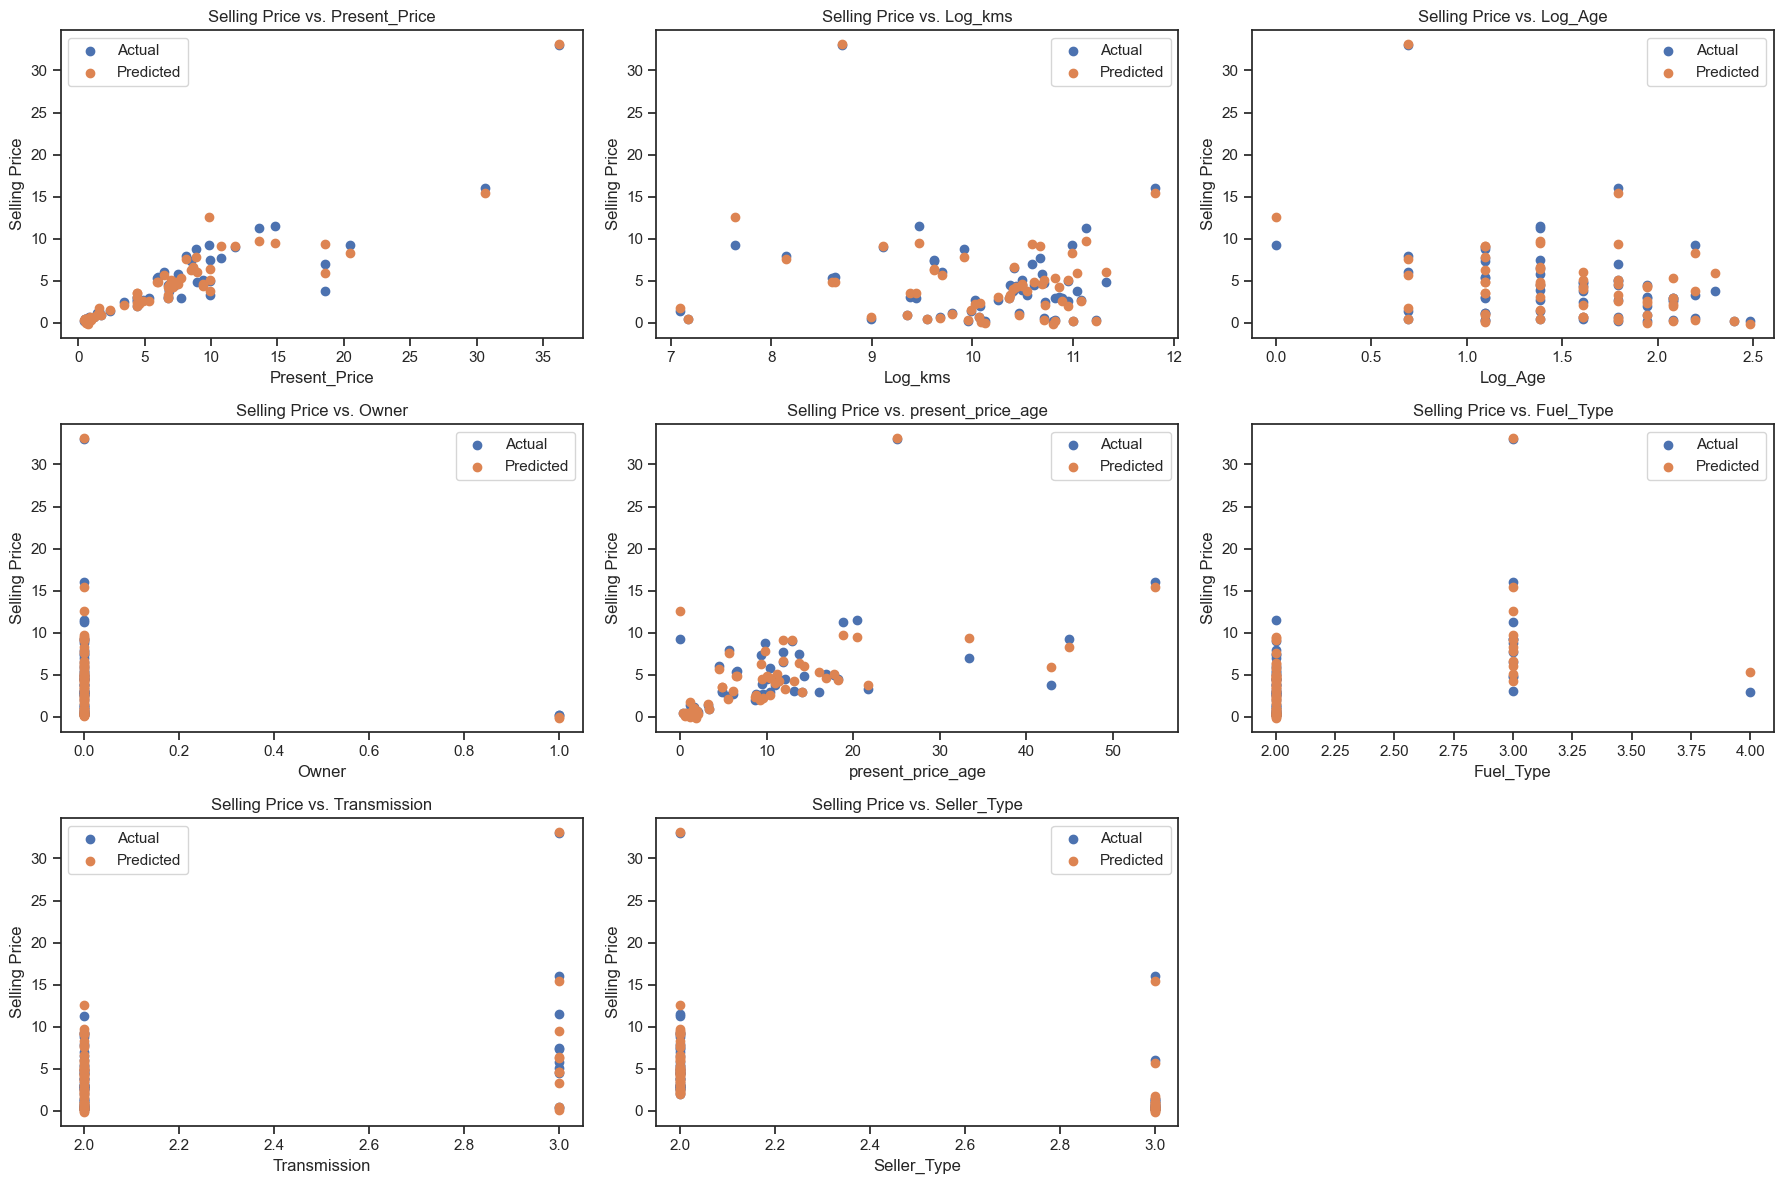

In [302]:
# Define features to compare
features_to_plot = ['Present_Price', 'Log_kms', 'Log_Age', 'Owner', 'present_price_age','Fuel_Type','Transmission','Seller_Type']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D for easy indexing
# Loop through features and plot
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(X6_test[feature], y6_test, label='Actual')
    axes[i].scatter(X6_test[feature], y6_pred, label='Predicted')
    axes[i].set_title(f"Selling Price vs. {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Selling Price")
    axes[i].legend()
# Hide unused subplot 
if len(features_to_plot) < len(axes):
    for j in range(len(features_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("Images/Final Visualization.png", dpi=300, bbox_inches="tight")
plt.show()

<span style="font-size: 18px; color: magenta;"> Data Prediction</span>

we want to find the present price of a car with following features
    * find the price
    
    * present price: 11:23
    
    * kms: 42000
    
    * fuel: petrol
    
    * seller: dealer
    
    * transmission: manual
    
    * owner: 1
    
    * age:10
    
    * price:?

In [309]:
# First we need to insert the data that we have been given
new_data = pd.DataFrame([{
    'Present_Price': 11.23,
    'Fuel_Type': 2,             #  Petrol
    'Seller_Type': 2,           #  Dealer
    'Transmission': 2, #  Manual
    'Owner': 1,
    'Log_kms': np.log1p(42000),
    'Log_Age': np.log1p(10),
    'present_price_age': 11.23 * np.log1p(10)
}])
new_data

,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Log_kms,Log_Age,present_price_age
0,11.23,2,2,2,1,10.645449,2.397895,26.928364


In [310]:
# We need to fit the new dataset to the original
# Fit scaler on X6
scaler.fit(X6)
# Transform new data and convert back to DataFrame
new_data_scaled = pd.DataFrame(
    scaler.transform(new_data[X6.columns]),
    columns=X6.columns
)

# Select the features for prediction
features = ['Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission',
            'Owner', 'Log_kms', 'Log_Age', 'present_price_age']

X_new = new_data_scaled[features]

In [311]:
#Predicting the price
predicted_price = regressor.predict(X_new)
print("Predicted Selling Price:", predicted_price[0])

Predicted Selling Price: [1.63542705]


<span style="font-size: 18px; color: Blue;"> The model predicts a car with those feature will have selling price of 1.63 </span>